<h1>3. Classifying Digit Images Using Decision Trees</h1>
<h3><b> Preprocessing Steps:</b></h3>
<ul>
    <li>Normalize pixel values.</li>
    <li>Reshape data as needed for model input.</li>
</ul>
<h3><b>Task:</b> Implement a decision tree classifier to classify handwritten digits and evaluate the model using accuracy and confusion matrix.</h3>

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Loading the dataset
mnist_train_dataset = pd.read_csv('..\\..\\Datasets\\MNIST Dataset\\MNIST_train.csv')
mnist_test_dataset = pd.read_csv('..\\..\\Datasets\\MNIST Dataset\\MNIST_test.csv')

print('Train Dataset:',mnist_train_dataset.shape)
print('Test Dataset:',mnist_test_dataset.shape)

Train Dataset: (60000, 785)
Test Dataset: (10000, 785)


In [3]:
# Printing information of the dataset
print(mnist_train_dataset.info(), '\n')
print(mnist_test_dataset.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None 



In [4]:
# Printing basic statistics of the dataset
mnist_train_dataset.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [5]:
mnist_test_dataset.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Abdul Rehman Tahir\AppData\Local\Temp\ipykernel_1592\1011195425.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()


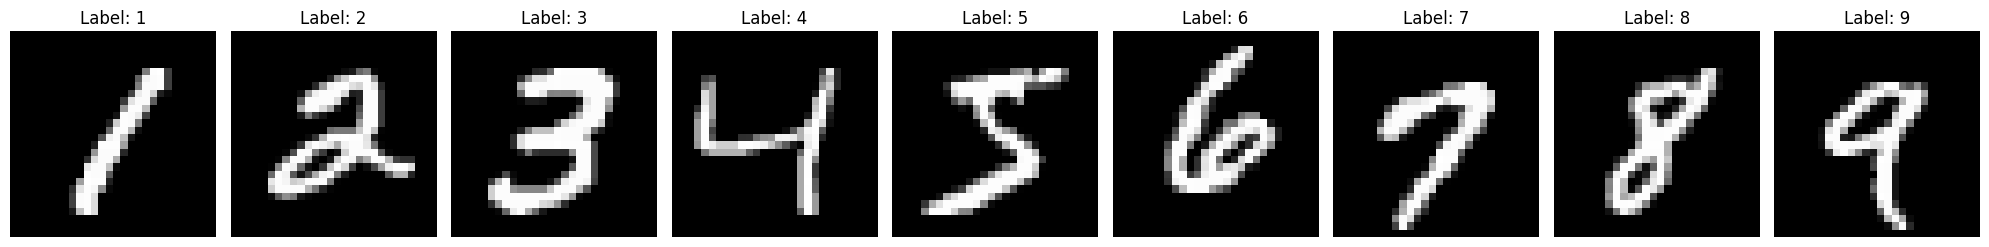

In [6]:
# Showing the digital images corresponding to the labels in the data
labels_to_find = [1, 2, 3, 4, 5, 6, 7, 8, 9]
filtered_df = mnist_train_dataset[mnist_train_dataset['label'].isin(labels_to_find)]   # Finding indexes of particular labels

indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()

fig, axes = plt.subplots(1, len(indexes), figsize=(20, 5))
for i, index in enumerate(indexes):
    image = mnist_train_dataset.iloc[index, 1:].values.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {mnist_train_dataset.iloc[index]["label"]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<h2>Data Preprocessing</h2>

In [7]:
# Checking for missing values in the dataset
print('Training dataset missing values:', mnist_train_dataset.isnull().sum().sum())
print('Test dataset missing values:', mnist_test_dataset.isnull().sum().sum())

Training dataset missing values: 0
Test dataset missing values: 0


-> Since there are no missing values, we can proceed to the data preprocessing steps.

In [8]:
# Separating the features and target variables from train and test dataset first i.e, splitting the dataset.
X_train = mnist_train_dataset.drop('label', axis=1)
Y_train = mnist_train_dataset['label']

X_test = mnist_test_dataset.drop('label', axis=1)
Y_test = mnist_test_dataset['label']

<h3>1. Normalize pixel values</h3>

In [9]:
# Applying Normalization (making values ranges from 0 to 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Saving the preprocessed data
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
# Printing basic statistics of the data
X_train.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000789,0.000350,0.000180,0.000076,0.000060,0.000032,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023789,0.015576,0.011225,0.006667,0.006607,0.005590,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [11]:
X_test.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000706,0.000644,0.000208,0.000002,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022339,0.022583,0.009565,0.000237,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996063,0.996063,0.616601,0.023715,0.0,0.0,0.0,0.0,0.0,0.0


-> Data has been normalized since all the pixel values are in [0, 1] range.

<h3>2. Reshape Data for Model Input</h3>

-> No reshaping is necessary as the data is already in the shape (n_samples, n_features). So, we can directly fit the decision tree model on this training set.

<h2>Model Training</h2>

In [12]:
# Implementing the model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [13]:
# Predicting the target variable 
Y_pred = dtc_model.predict(X_test)

<h2>Model Evaluation</h2>

<h3>1. Accuracy Score</h3>

In [14]:
# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.8783


<h3>2. Confusion Matrix</h3>

In [15]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[ 919    0   10    6    3   13   11    5    7    6]
 [   2 1092   10    4    2    4    7    3   10    1]
 [  10    8  890   33    9   13   12   23   25    9]
 [   7    8   27  859    6   46    7    8   19   23]
 [   6    4    9    7  865    8   16    9   20   38]
 [  10    5    5   44    8  747   23    4   26   20]
 [  14    5   10   10   19   18  847    1   27    7]
 [   2   11   26   20    9    4    2  920    9   25]
 [  12    6   30   42   19   31   17   10  786   21]
 [  13    4    7   21   42   11    5   19   29  858]]


-> Interpreting confusion matrix:
<p> <b>Diagonal Elements:</b> These represent the number of correctly classified instances for each digit. For example, the matrix shows that 917 instances of digit '0' were correctly classified as '0'. <br><br>
<b>Off-Diagonal Elements:</b> These represent misclassifications. For instance, in the first row, the model misclassified digit '0' as digit '2' 6 times, as digit '3' 6 times, and so on.</p>

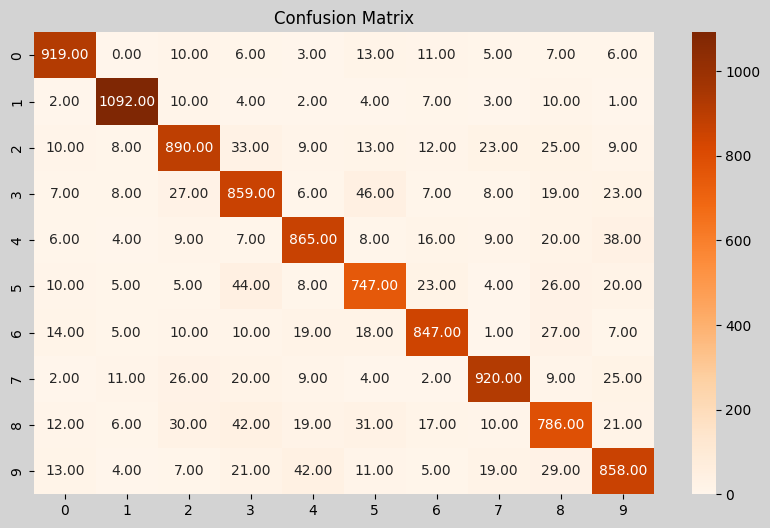

In [16]:
plt.figure(figsize=(10, 6), facecolor='lightgray')
sns.heatmap(conf_matrix, cmap='Oranges', annot=True, fmt='.2f')
plt.title('Confusion Matrix')
plt.show()

-> The decision tree classifier achieved an accuracy of 87.84%, indicating it performs well in classifying handwritten digits. The confusion matrix shows that the model correctly classifies most digits, with some confusion between similar-looking digits like 3, 5, and 8. Errors are more frequent in digits that have visually similar features, suggesting the model might benefit from more sophisticated preprocessing or model tuning.

<hr>